<a href="https://colab.research.google.com/github/Balajisasi/Image--Recognition/blob/main/Balaji_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [6]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
# Get the shape of the DataFrame
print(df.shape)

# List all column names
print(df.columns)

# Get data types of each column
print(df.dtypes)

# Summary statistics of numerical columns
print(df.describe())

(3000, 9)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000         

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


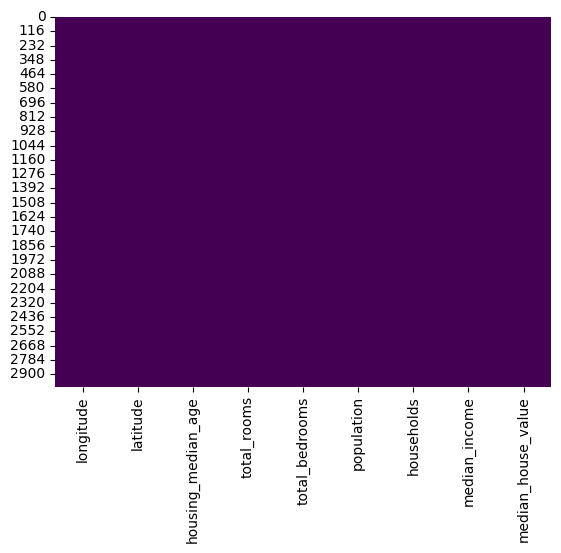

In [8]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values (if any)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


In [9]:
# Drop rows with missing values
df = df.dropna()

# Or fill missing values
df['total_rooms'] = df['total_rooms'].fillna(df['total_rooms'].mean())


# Remove duplicates
df = df.drop_duplicates()

# Convert columns to appropriate data types if necessary
df['median_income'] = df['median_income'].astype(int)

# Handling outliers (optional)
# Example: Removing outliers in population column
Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['population'] < (Q1 - 1.5 * IQR)) | (df['population'] > (Q3 + 1.5 * IQR)))]


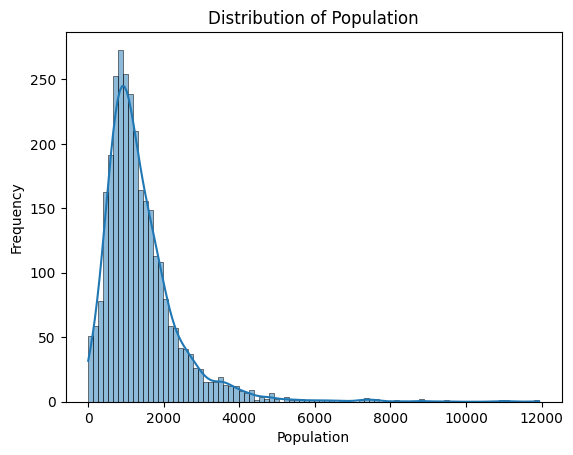

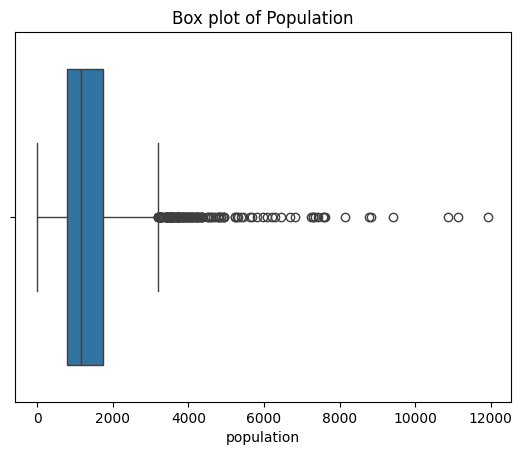

In [10]:
# Histogram for population
sns.histplot(df['population'], kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# Box plot for population
sns.boxplot(x=df['population'])
plt.title('Box plot of Population')
plt.show()


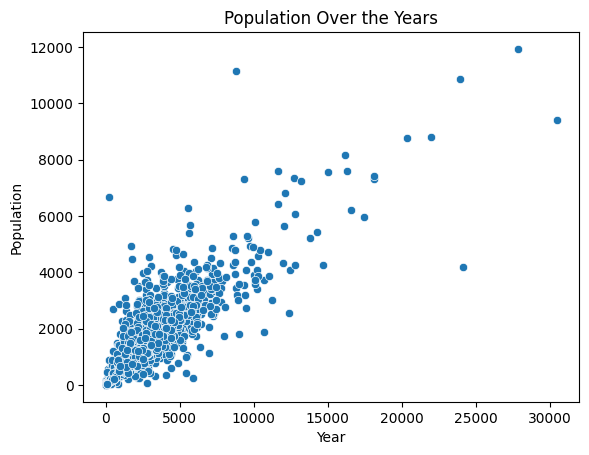

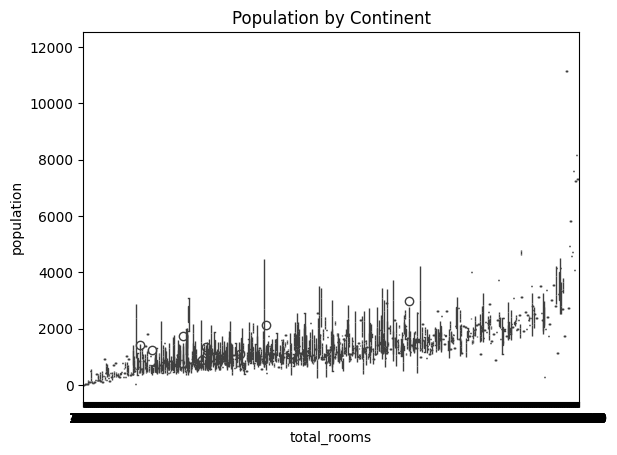

In [11]:
# Scatter plot of population vs. year
sns.scatterplot(x='total_rooms', y='population', data=df)
plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

# Box plot of population by continent (if applicable)
sns.boxplot(x='total_rooms', y='population', data=df)
plt.title('Population by Continent')
plt.show()


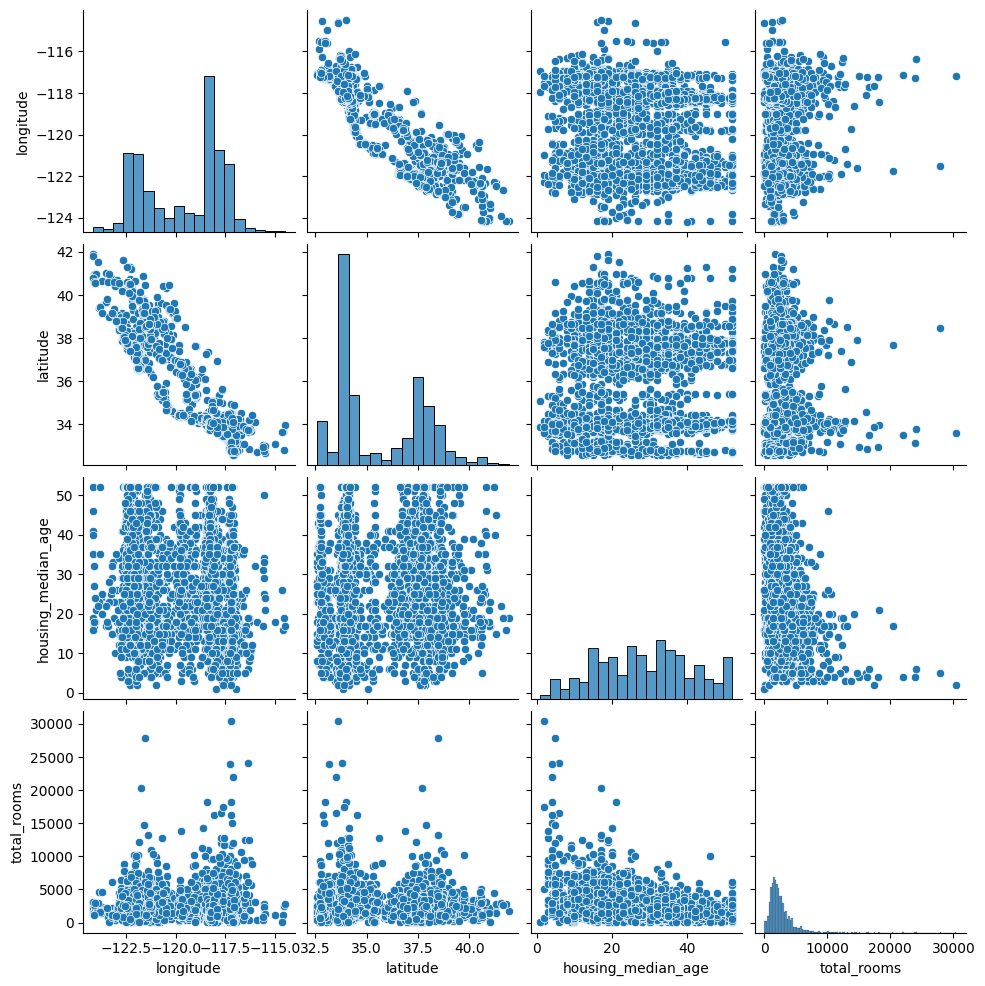

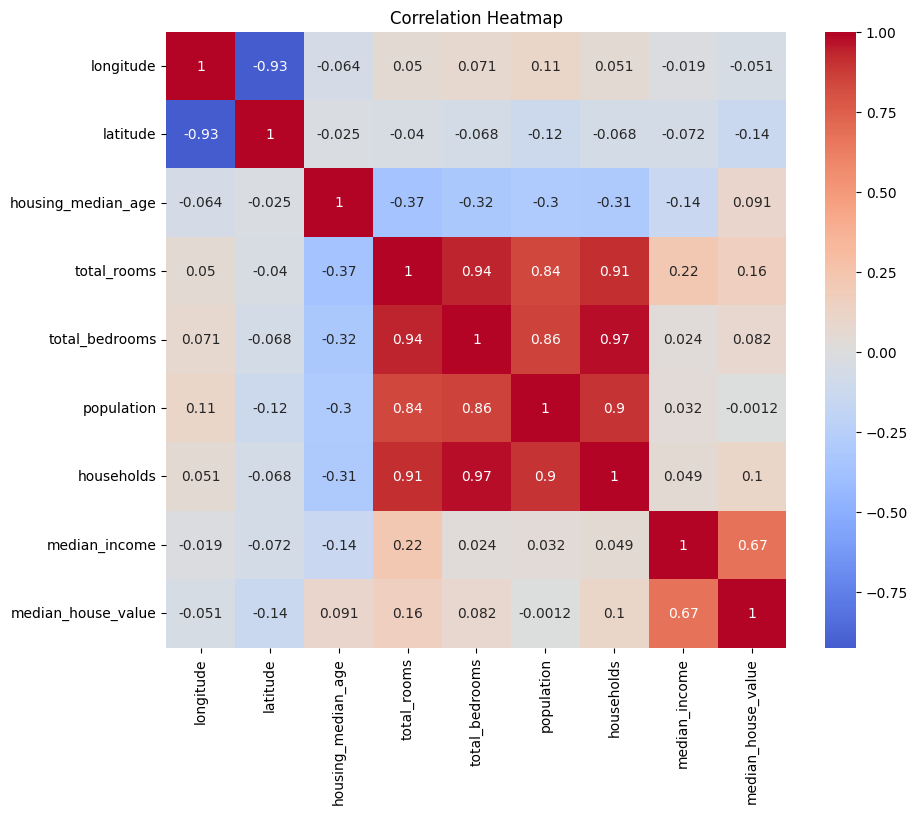

In [12]:
# Pairplot for key variables
sns.pairplot(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms']])  # Replace with relevant columns
plt.show()

# Heatmap of correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Define the threshold for high population
threshold = 1_000_000  # 1 million

# Create a new column 'high_population' based on the threshold
df['high_population'] = df['population'].apply(lambda x: 1 if x > threshold else 0)

# Verify the new column
print(df[['population', 'high_population']].head())


   population  high_population
0      1537.0                0
1       809.0                0
2      1484.0                0
3        49.0                0
4       850.0                0


# Example: Calculate population growth rate
df['population_growth_rate'] = df['population'].pct_change()

# Example: Create a new feature based on conditions
df['high_population'] = df['population'].apply(lambda x: 1 if x > threshold else 0)


In [14]:
df.to_csv('/content/sample_data/california_housing_test.csv', index=False)
